In [ ]:
# Install tensorflowjs for download model
!pip install tensorflowjs

In [ ]:
# Declare constants
EPOCHS: int = 14
BATCH_SIZE: int = 128
TEST_SIZE: float = 0.1
TEST_BATCH_SIZE: int = 64
RANDOM_STATE: int = 42
NUM_CLASSES: int = 10

In [ ]:
from keras.datasets import mnist

# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split

# Normalize images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Label encoding
y_train = to_categorical(y_train, num_classes=NUM_CLASSES)
y_test = to_categorical(y_test, num_classes=NUM_CLASSES)

# Split data for validation
x_train, x_val, y_train, y_val = train_test_split(x_train,
                                                  y_train,
                                                  test_size=TEST_SIZE,
                                                  random_state=RANDOM_STATE)

In [ ]:
# Reshape input images (n_samples, h * w)
# This reshaping works because dataset images are grayscale.
x_train = x_train.reshape(x_train.shape[0], -1)
x_val = x_val.reshape(x_val.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

print('|==== Shapes ====|', '\n')

print(f'x_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}', '\n')

print(f'x_val shape: {x_val.shape}')
print(f'y_val shape: {y_val.shape}', '\n')

print(f'x_test shape: {x_test.shape}')
print(f'y_test shape: {y_test.shape}', '\n')

print('|==== Samples ====|', '\n')

print(f'validation samples: {x_val.shape[1]}')
print(f'test samples: {x_test.shape[1]}', '\n')

|==== Shapes ====| 

x_train shape: (54000, 784)
y_train shape: (54000, 10) 

x_val shape: (6000, 784)
y_val shape: (6000, 10) 

x_test shape: (10000, 784)
y_test shape: (10000, 10) 

|==== Samples ====| 

validation samples: 784
test samples: 784 



In [ ]:
# Build the FC model

from tensorflow.keras import Input, Sequential, layers

print('|==== Building the model... ====|', '\n')
model = Sequential([
                    Input(shape=(x_train.shape[1],)),
                    layers.Dense(256, activation='sigmoid'),
                    layers.Dense(128, activation='sigmoid'),
                    layers.Dense(10, activation='softmax')
])

model.summary()

|==== Building the model... ====| 

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_69 (Dense)            (None, 256)               200960    
                                                                 
 dense_70 (Dense)            (None, 128)               32896     
                                                                 
 dense_71 (Dense)            (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the model

from tensorflow.keras.optimizers import Adam

adam = Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=adam, metrics=['accuracy'])

print('|==== Training the model... ====|', '\n')
history = model.fit(x_train,
                    y_train,
                    validation_data=(x_val, y_val),
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE)

|==== Training the model... ====| 

Epoch 1/14
422/422 [==============================] - 3s 7ms/step - loss: 0.6479 - accuracy: 0.8390 - val_loss: 0.2812 - val_accuracy: 0.9208
Epoch 2/14
422/422 [==============================] - 3s 6ms/step - loss: 0.2461 - accuracy: 0.9279 - val_loss: 0.2012 - val_accuracy: 0.9403
Epoch 3/14
422/422 [==============================] - 3s 6ms/step - loss: 0.1867 - accuracy: 0.9457 - val_loss: 0.1622 - val_accuracy: 0.9517
Epoch 4/14
422/422 [==============================] - 3s 6ms/step - loss: 0.1481 - accuracy: 0.9569 - val_loss: 0.1369 - val_accuracy: 0.9588
Epoch 5/14
422/422 [==============================] - 3s 6ms/step - loss: 0.1206 - accuracy: 0.9650 - val_loss: 0.1174 - val_accuracy: 0.9648
Epoch 6/14
422/422 [==============================] - 3s 6ms/step - loss: 0.0993 - accuracy: 0.9715 - val_loss: 0.1007 - val_accuracy: 0.9693
Epoch 7/14
422/422 [==============================] - 3s 6ms/step - loss: 0.0817 - accuracy: 0.9770 - val_loss: 

In [ ]:
# Evaluate the model

from sklearn.metrics import classification_report

print('|==== Evaluating the model... ====|', '\n')

target_names = [str(label) for label in range(NUM_CLASSES)]
predictions = model.predict(x_test, batch_size=TEST_BATCH_SIZE)
report = classification_report(y_test.argmax(axis=1),
                               predictions.argmax(axis=1),
                               target_names=target_names)
print(report, '\n')

|==== Evaluating the model... ====| 

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.97      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.97      0.98      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000
 



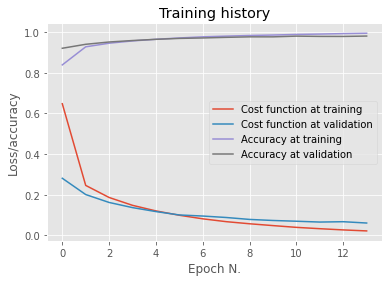

In [ ]:
# Plot model cost function iterations in training session

import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure()

epoch_values = list(range(EPOCHS))
plt.plot(epoch_values, history.history['loss'], label='Cost function at training')
plt.plot(epoch_values, history.history['val_loss'], label='Cost function at validation')
plt.plot(epoch_values, history.history['accuracy'], label='Accuracy at training')
plt.plot(epoch_values, history.history['val_accuracy'], label='Accuracy at validation')

plt.title('Training history')
plt.xlabel('Epoch N.')
plt.ylabel('Loss/accuracy')
plt.legend()

In [ ]:
%rm keras.h5
model.save('keras.h5')

In [ ]:
%rm -r model
%mkdir model

!tensorflowjs_converter --input_format keras keras.h5 model/

In [ ]:
# Download model
from google.colab import files
!zip -r model.zip model
files.download('model.zip')

updating: model/ (stored 0%)
updating: model/group1-shard1of1.bin (deflated 7%)
updating: model/model.json (deflated 74%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>